In [1]:
import sys
#sys.path = ['../../src/dynamixel_hr/dxl_python3'] + sys.path
sys.path = ['dxl'] + sys.path

In [2]:
import dxlchain as Dxl
import logging
import numpy as np
import time

In [3]:
logger = logging.getLogger()
# logger.setLevel('DEBUG')
#logger.setLevel('WARN')

In [4]:
from importlib import reload
reload(Dxl)

<module 'dxlchain' from 'dxl/dxlchain.py'>

In [5]:
# Open the serial device
chain=Dxl.DxlChain("/dev/ttyACM0",rate=1000000, timeout=0.4)

In [6]:
# Load all the motors and obtain the list of IDs
motors=chain.get_motor_list() # Discover all motors on the chain and return their IDs
print(motors)

[1, 2, 3, 4]


In [14]:
chain.motors

{1: <dxlmotors.DxlMotorMX64 at 0x7fdcb12ef470>,
 2: <dxlmotors.DxlMotorMX28 at 0x7fdcb12efb38>,
 3: <dxlmotors.DxlMotorMX28 at 0x7fdcb12efef0>,
 4: <dxlmotors.DxlMotorMX28 at 0x7fdcb1300a58>}

In [8]:
chain.set_reg(5, 'return_delay', 0)

In [19]:
chain.set_reg(4, 'moving_speed', 500)

In [9]:
chain.get_reg(4, 'ccw_angle_limit')

4095

In [17]:
chain.set_control_mode(4, chain.motors[4].SpeedControl)

In [20]:
for i in range(1,5):
    chain.set_control_mode(i, chain.motors[i].SpeedControl)

In [26]:
chain.sync_write_x(motors, 'moving_speed', [1023] * len(motors))

In [24]:
for i in range(1,5):
    chain.set_control_mode(i, chain.motors[i].PositionControl)

In [27]:
chain.sync_write_x(motors, 'goal_pos', [2000] * len(motors))

In [55]:
chain.bulk_multi_read([1,2,3,4])

{1: {'goal_pos': 102,
  'moving_speed': 100,
  'present_load': 0,
  'present_position': 101,
  'present_speed': 0,
  'present_temp': 37,
  'present_voltage': 119,
  'torque_limit': 1023},
 2: {'goal_pos': 101,
  'moving_speed': 0,
  'present_load': 0,
  'present_position': 102,
  'present_speed': 0,
  'present_temp': 39,
  'present_voltage': 119,
  'torque_limit': 1023},
 3: {'goal_pos': 103,
  'moving_speed': 0,
  'present_load': 0,
  'present_position': 103,
  'present_speed': 0,
  'present_temp': 39,
  'present_voltage': 118,
  'torque_limit': 1023},
 4: {'goal_pos': 100,
  'moving_speed': 0,
  'present_load': 24,
  'present_position': 102,
  'present_speed': 0,
  'present_temp': 40,
  'present_voltage': 119,
  'torque_limit': 1023}}

In [27]:
[] == True

False

In [318]:
chain.motors[5].registers['torque_limit'].fromdxl([255,3])

1023

In [319]:
chain.get_reg(5, 'goal_pos'), chain.get_reg(1, 'moving_speed'), chain.get_reg(1, 'present_load')

(0, 100, 1032)

In [109]:
chain.motors[1].registers['present_temp'].__dict__

{'address': 43,
 'eeprom': False,
 'fromdxl': <function dxlregisters.DxlRegisterByte.__init__.<locals>.<lambda>>,
 'fromsi': <function dxlregisters.DxlRegisterByte.<lambda>>,
 'mode': 'r',
 'range': None,
 'size': 1,
 'todxl': <function dxlregisters.DxlRegisterByte.__init__.<locals>.<lambda>>,
 'tosi': <function dxlregisters.DxlRegisterByte.<lambda>>}

In [79]:
chain.get_reg(1, 'goal_pos'), chain.get_reg(1, 'moving_speed')

(100, 100)

In [63]:
chain.set_reg(1, 'goal_pos', 100), chain.

In [17]:
chain.set_reg(1, 'torque_enable', 0)

In [33]:
chain.goto(5, 100, speed=100)

In [10]:
chain.motors[1].speed_to_si(2024)
            

24.162617417289816

In [34]:
pos = 2000

In [14]:
chain.sync_writepos_speed([1], [pos, pos,pos], [100, 500,1000])

In [15]:
chain.get_position()

{1: 2001, 2: 2002, 3: 2002, 4: 2948, 5: 999}

In [31]:
chain.sync_read_pos([1,2,3])

[(1, 1998), (2, 1998), (3, 1997)]

In [ ]:
chain.sync_read_([1,2,3])

In [56]:
chain.get_configuration()

OrderedDict([(1,
              OrderedDict([('model_number', 310),
                           ('firmware', 39),
                           ('id', 1),
                           ('baud_rate', 1),
                           ('return_delay', 0),
                           ('cw_angle_limit', 0),
                           ('ccw_angle_limit', 0),
                           ('high_temp_limit', 80),
                           ('low_voltage_limit', 60),
                           ('high_voltage_limit', 160),
                           ('max_torque', 1023),
                           ('status_return_level', 2),
                           ('alarm_led', 36),
                           ('alarm_shutdown', 36),
                           ('torque_enable', 0),
                           ('led', 0),
                           ('d_gain', 0),
                           ('i_gain', 0),
                           ('p_gain', 32),
                           ('goal_pos', 102),
                           ('mov

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
# %matplotlib 

In [132]:
data=[]
ctrl=[]
motors=[1,2,3,4]
for t in range(1000):
    pos = np.sin(t/50.0)*1000+2048
    chain.sync_write_pos_speed(motors, [pos] * len(motors), [i*200 + 100 for i in motors])
    #time.sleep(0.01)    
    new_pos = [0] * len(motors)    
    for i,v in chain.sync_read_pos(motors).items():
        new_pos[i-1]=v
    #for i in motors:
    #    v = chain.get_position(i)
    #    new_pos[i-1]=v[i]
    
    data.append(new_pos)
    ctrl.append(pos)
data=np.asarray(data)

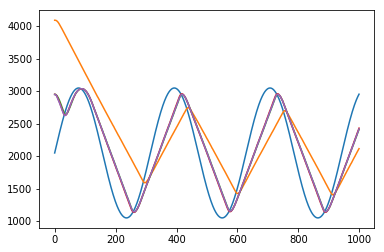

In [133]:
plt.plot(ctrl)
plt.plot(data[:,0])
plt.plot(data[:,1])
plt.plot(data[:,2])
plt.plot(data[:,3])

In [62]:
chain.sync_read([1,2,3],'present_position')

AttributeError: 'DxlChain' object has no attribute 'sync_read'

In [71]:
(esize,cmd)=chain.motors[1].getRegisterCmd("present_speed")

In [58]:
chain.set_control_mode(1, chain.motors[1].PositionControl)

In [48]:
chain.set_control_mode(1, chain.motors[1].SpeedControl)

In [129]:
chain.set_reg(1, "cw_angle_limit", 0)
chain.set_reg(1, "ccw_angle_limit", 4095)

In [47]:
chain.set_reg(1, "goal_torque", 0)

In [57]:
chain.set_reg(1, "moving_speed", 0)

In [72]:
chain.set_reg(1, "goal_pos", 400)

In [53]:
chain.motors[4].registers["goal_pos"].range

[0, 4095]

In [116]:
chain.motors[5].si_to_pos(-3.1415)

-620

In [117]:
chain.motors[5].pos_to_si(0)

0.0

In [118]:
chain.motors[5].pos_to_si(1024)

5.182929746722361